# Retail data association rule

In [14]:
import datetime
import numpy as np 
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [15]:
df=pd.read_csv('D:/Sayali/Completed_assign/Assign_10_Association_Rules/online_retail.csv')

In [16]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


# Data Preprocessing

**Convert date data to datetime**

In [18]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"]) 

**Extracting data 'year', 'month', 'day', 'hour', 'day of week'**

In [19]:
df['year'] = df['InvoiceDate'].dt.year
df['month'] = df['InvoiceDate'].dt.month
df['day'] = df['InvoiceDate'].dt.day
df['hour'] = df['InvoiceDate'].dt.hour
df['week'] = df['InvoiceDate'].dt.dayofweek

**Extracting data 'year' and 'month'**

In [20]:
df['year_month']=df['InvoiceDate'].dt.strftime('%Y-%m')

**Add the column which shows 'Amount' which is calucrated by multiplying 'Quantity' with 'UnitPrice'**

In [21]:
df['Amount']=df['Quantity']*df['UnitPrice']

In [22]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,day,hour,week,year_month,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,8,2,2010-12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,2,2010-12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,8,2,2010-12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,2,2010-12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,2,2010-12,20.34


# Data Visualization

**Total amount by year**

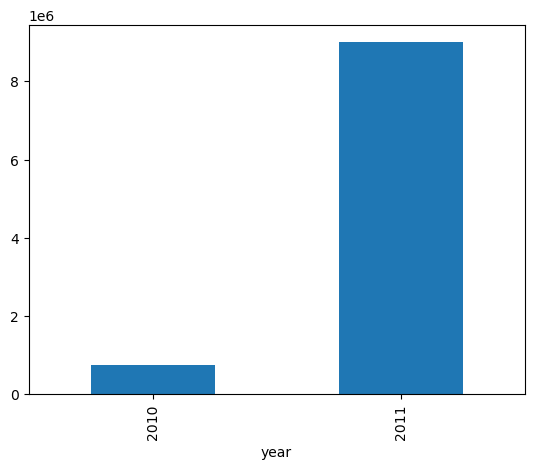

In [23]:
df.groupby('year')['Amount'].sum().plot.bar();

**Time series by amount**

In [24]:
df1=pd.DataFrame(df.groupby('year_month')['Amount'].sum())
df1=df1.reset_index()

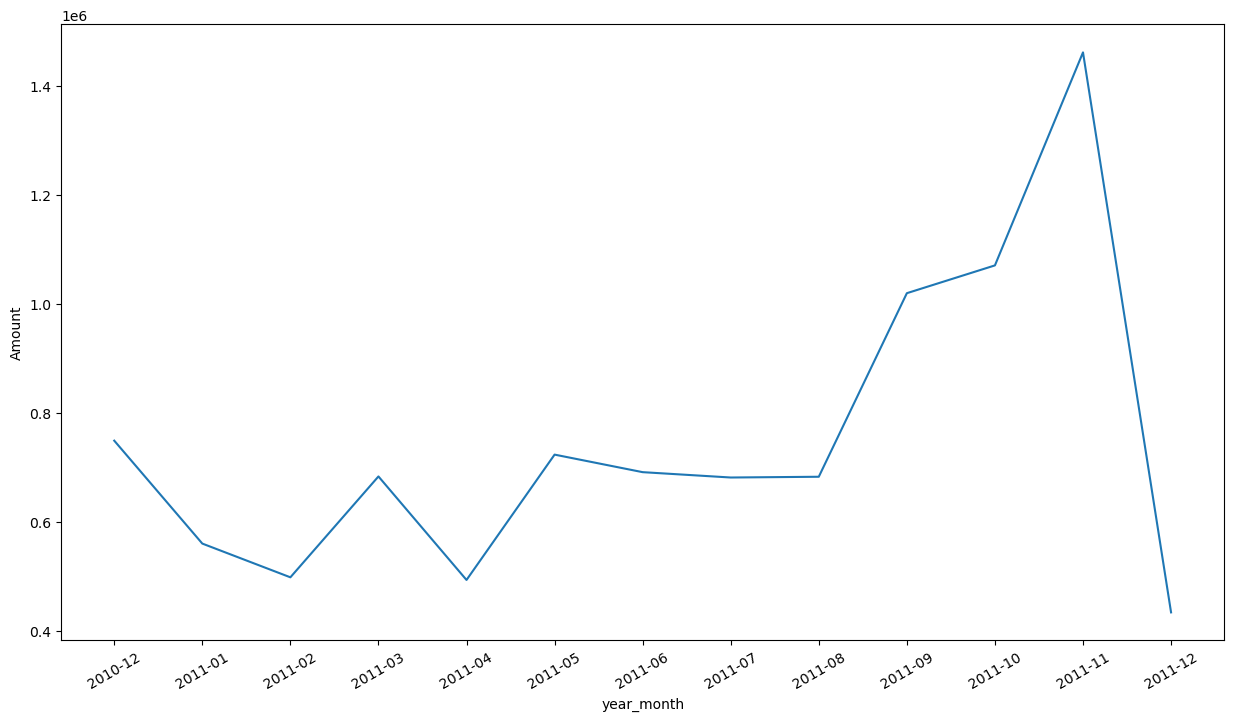

In [25]:
plt.figure(figsize=(15, 8))
sns.lineplot(data=df1,x='year_month',y='Amount')
plt.xticks(rotation=30);

**Amount ratio by countries**

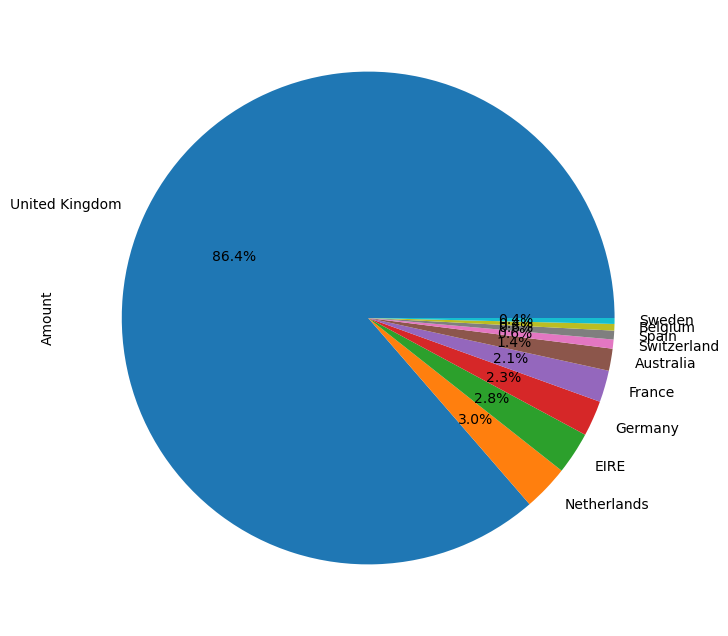

In [26]:
df.groupby('Country')['Amount'].sum().sort_values(ascending=False).head(10).plot.pie(autopct="%1.1f%%",figsize=(15, 8));

**Top 50 products which sell well**

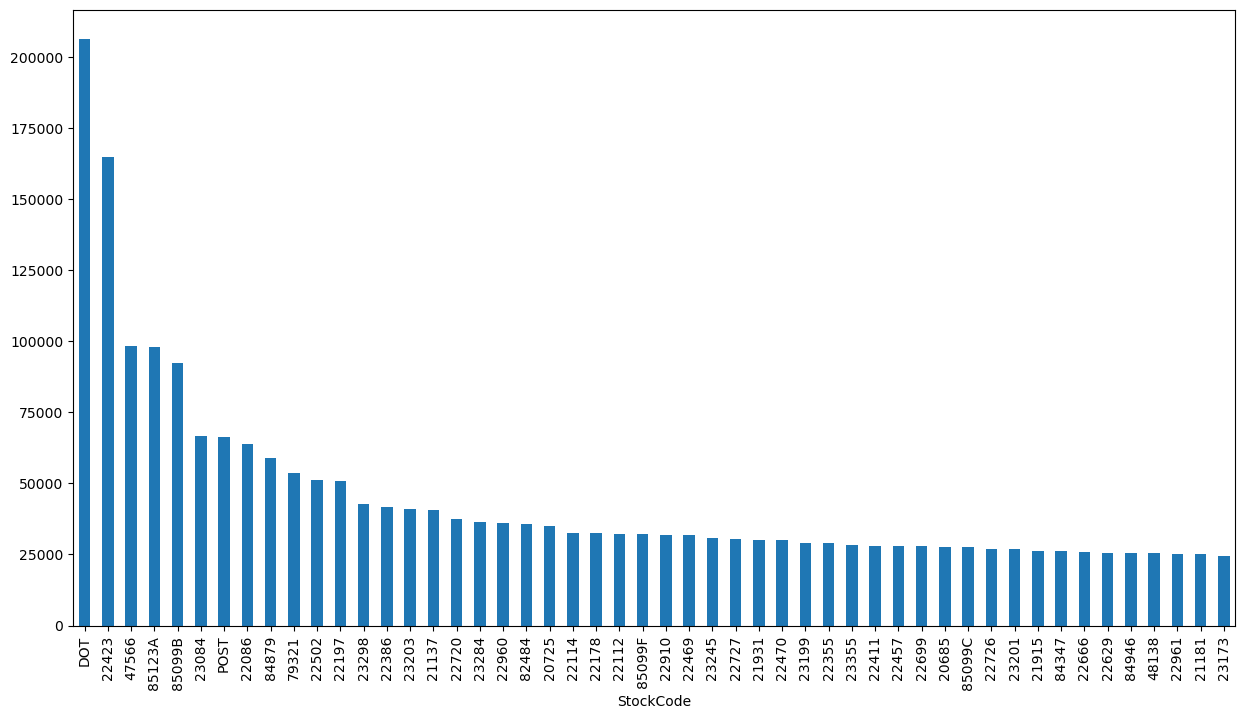

In [27]:
df.groupby('StockCode')['Amount'].sum().sort_values(ascending=False).head(50).plot.bar(figsize=(15, 8));

**Cumulative sum curve of products which sell well**

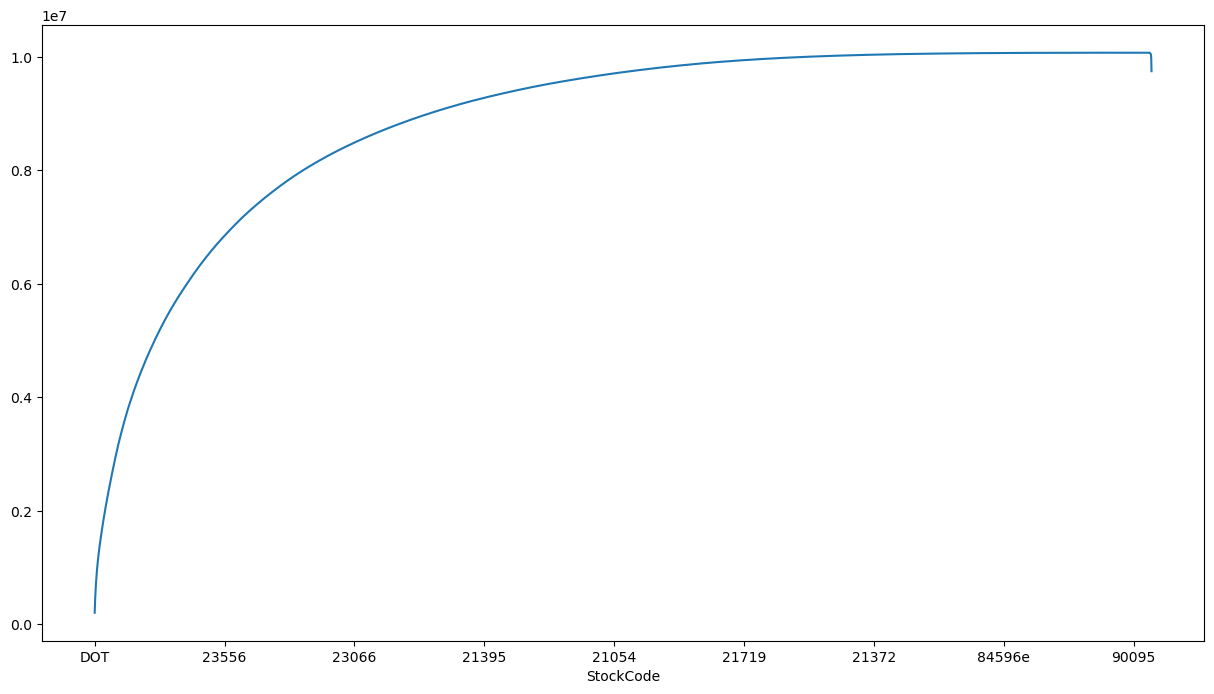

In [28]:
df_rev=pd.DataFrame(df.groupby('StockCode')['Amount'].sum().sort_values(ascending=False))
df_rev['Amount'].cumsum().plot(figsize=(15, 8));

**Pareto principle**

In [29]:
df_rev['Amount'].head(800).sum()/df_rev['Amount'].sum()

0.8199114897219499

In [30]:
800/df_rev.index.nunique()

0.19656019656019655

* **20% of items occupy more than 80% of revenue.**

**Worst 50 products which do not sell well**

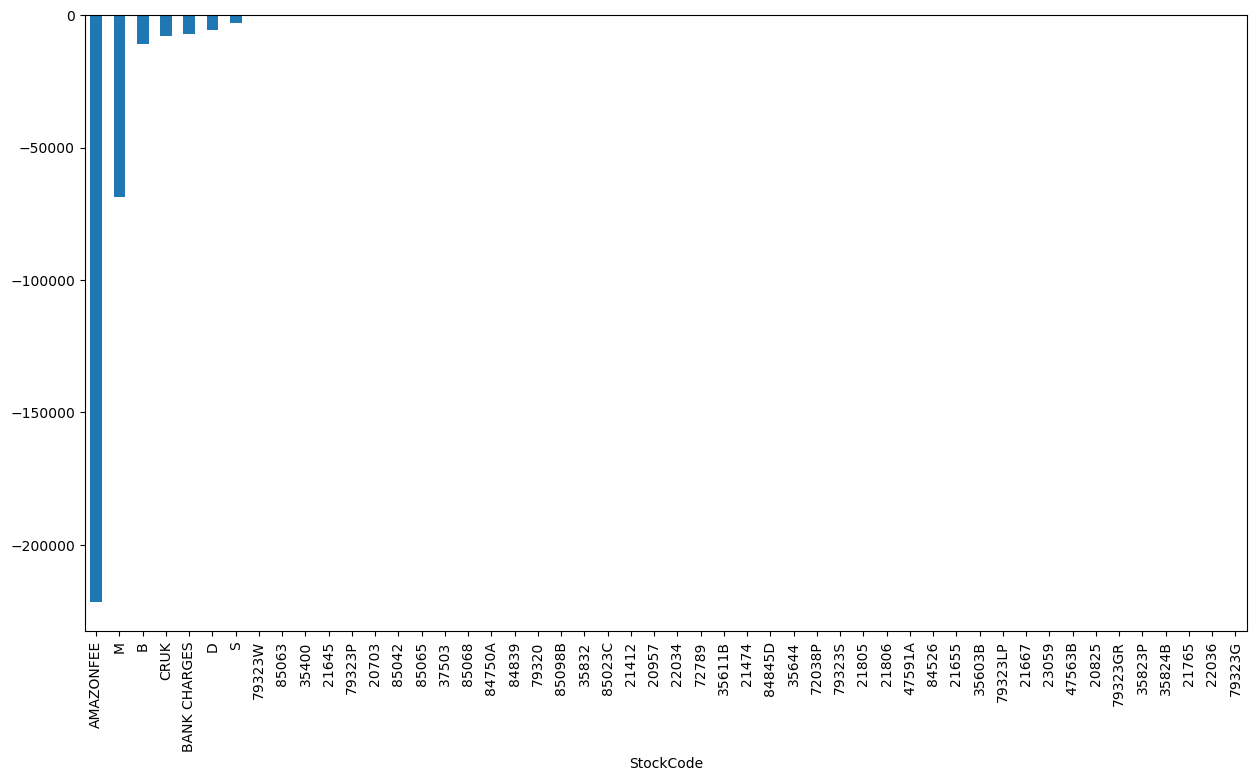

In [31]:
df.groupby('StockCode')['Amount'].sum().sort_values(ascending=True).head(50).plot.bar(figsize=(15, 8));

* **Fee for Amazon occupy negative revenue.**

**Time Series, Unitprice Boxplot, Unitprice Time Series, Quantity Boxplot, Quantity Time Series of main products, 'DOT', '22423' and 'AMAZON FEE'**

**1) DOT**

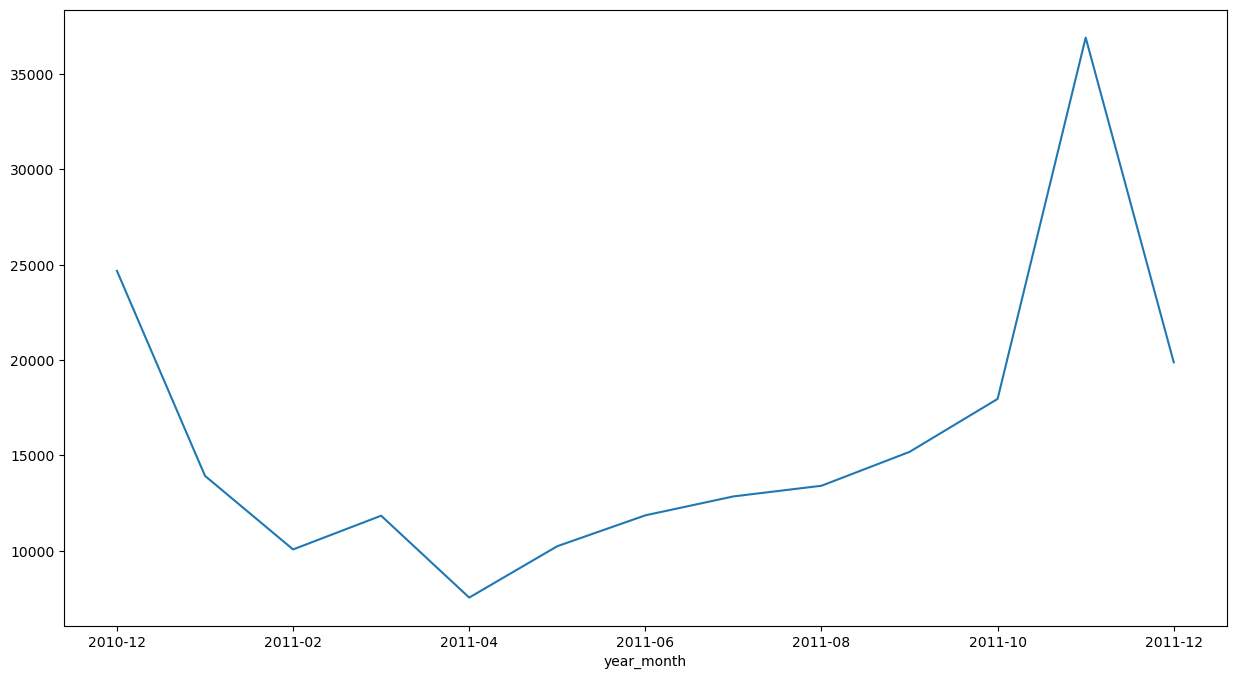

In [32]:
df[df['StockCode']=='DOT'].groupby('year_month')['Amount'].sum().plot(figsize=(15, 8));

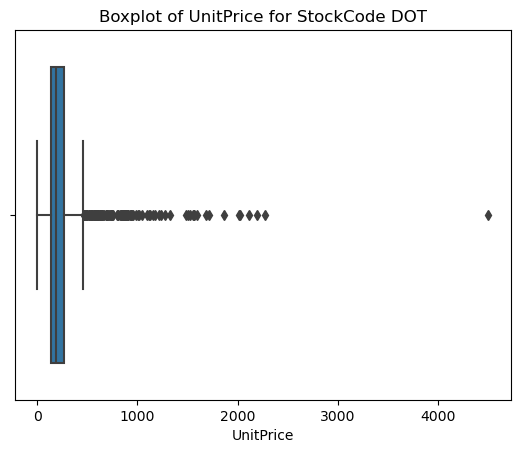

In [33]:
# dot_df.dropna(subset=['UnitPrice'], inplace=True)

sns.boxplot(data=df[df['StockCode'] == 'DOT'], x='UnitPrice')
plt.title('Boxplot of UnitPrice for StockCode DOT')
plt.show()

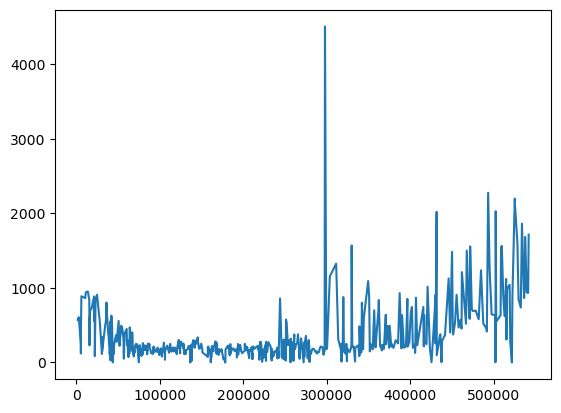

In [34]:
df[df['StockCode']=='DOT']['UnitPrice'].plot();

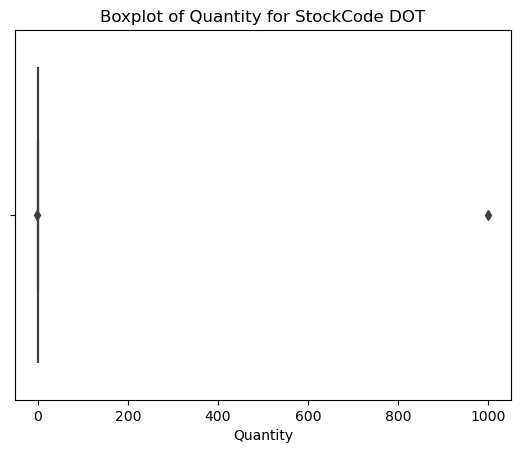

In [35]:
sns.boxplot(data=df[df['StockCode']=='DOT'], x='Quantity');
plt.title('Boxplot of Quantity for StockCode DOT')
plt.show()

<Axes: >

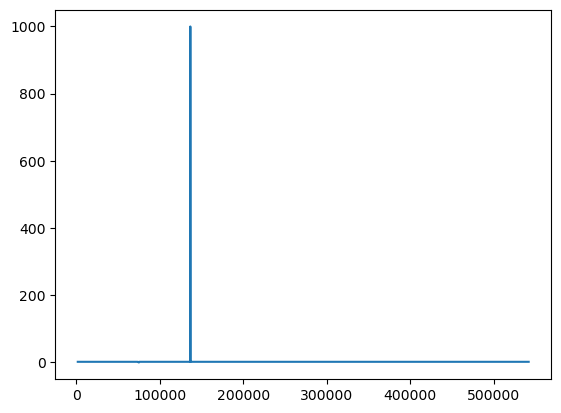

In [36]:
df[df['StockCode']=='DOT']['Quantity'].plot()

**2) 22423**

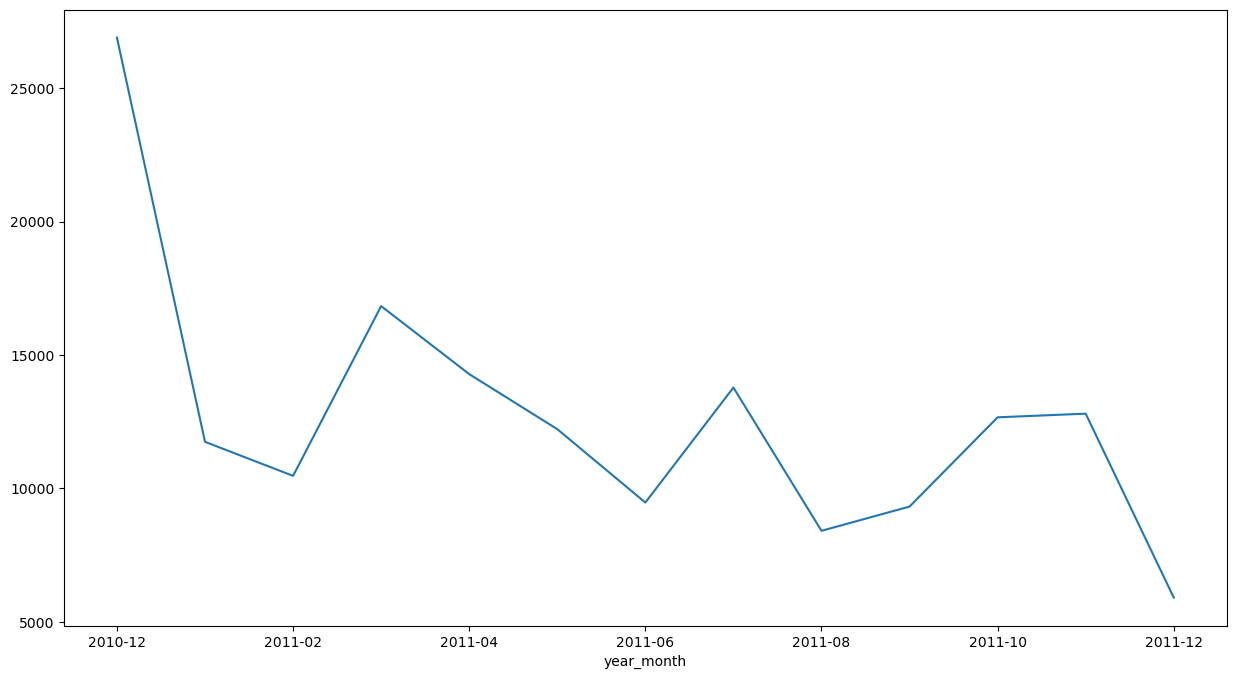

In [37]:
df[df['StockCode']=='22423'].groupby('year_month')['Amount'].sum().plot(figsize=(15, 8));

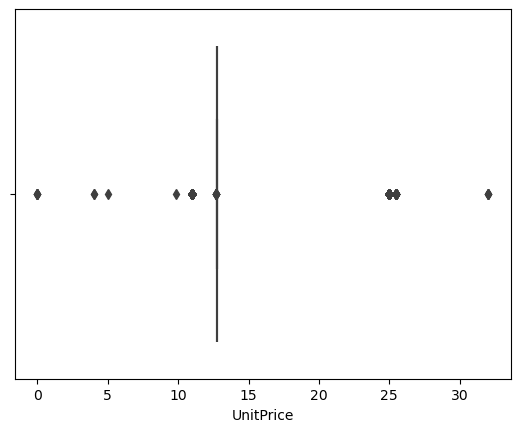

In [38]:
sns.boxplot(data=df[df['StockCode']=='22423'], x='UnitPrice');

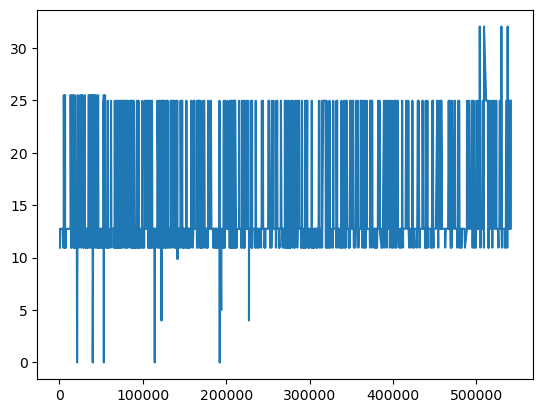

In [39]:
df[df['StockCode']=='22423']['UnitPrice'].plot();

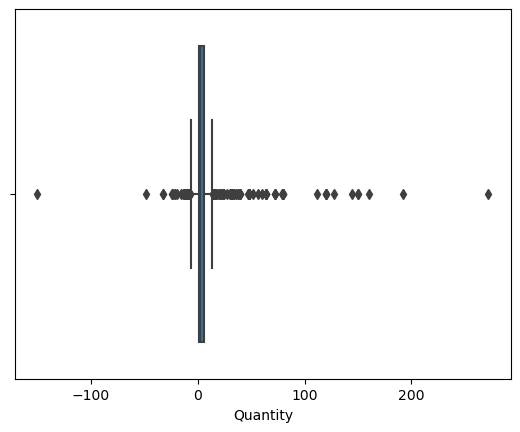

In [40]:
sns.boxplot(data=df[df['StockCode']=='22423'], x='Quantity');

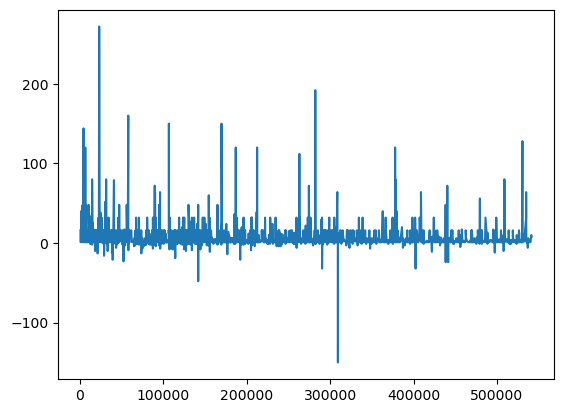

In [41]:
df[df['StockCode']=='22423']['Quantity'].plot();

**3) AMAZON FEE**

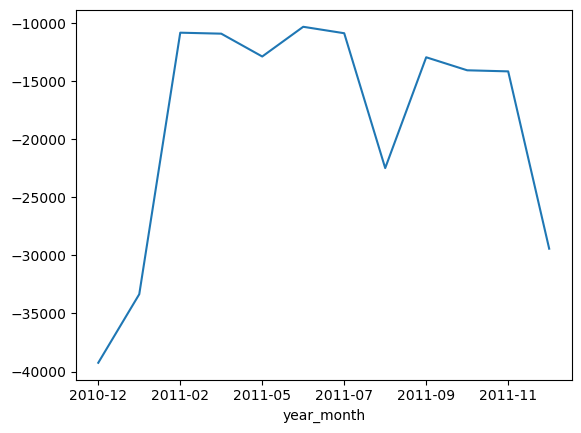

In [42]:
df[df['StockCode']=='AMAZONFEE'].groupby('year_month')['Amount'].sum().plot();

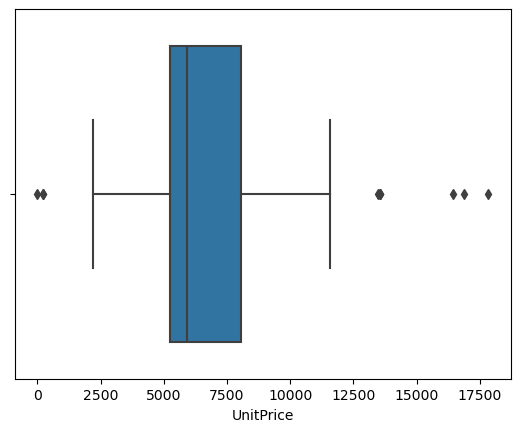

In [43]:
sns.boxplot(data=df[df['StockCode']=='AMAZONFEE'], x='UnitPrice');

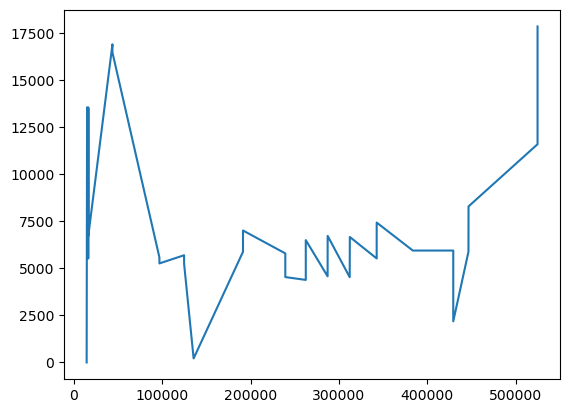

In [44]:
df[df['StockCode']=='AMAZONFEE']['UnitPrice'].plot();

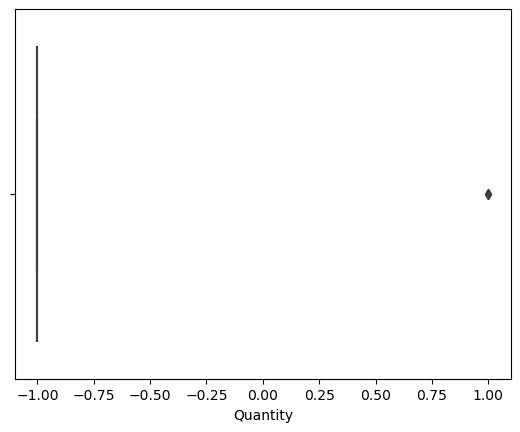

In [45]:
sns.boxplot(data=df[df['StockCode']=='AMAZONFEE'], x='Quantity');

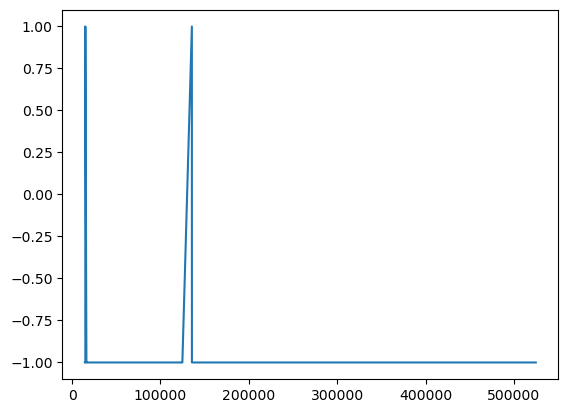

In [46]:
df[df['StockCode']=='AMAZONFEE']['Quantity'].plot();

**Top 50 customers which purchase well**

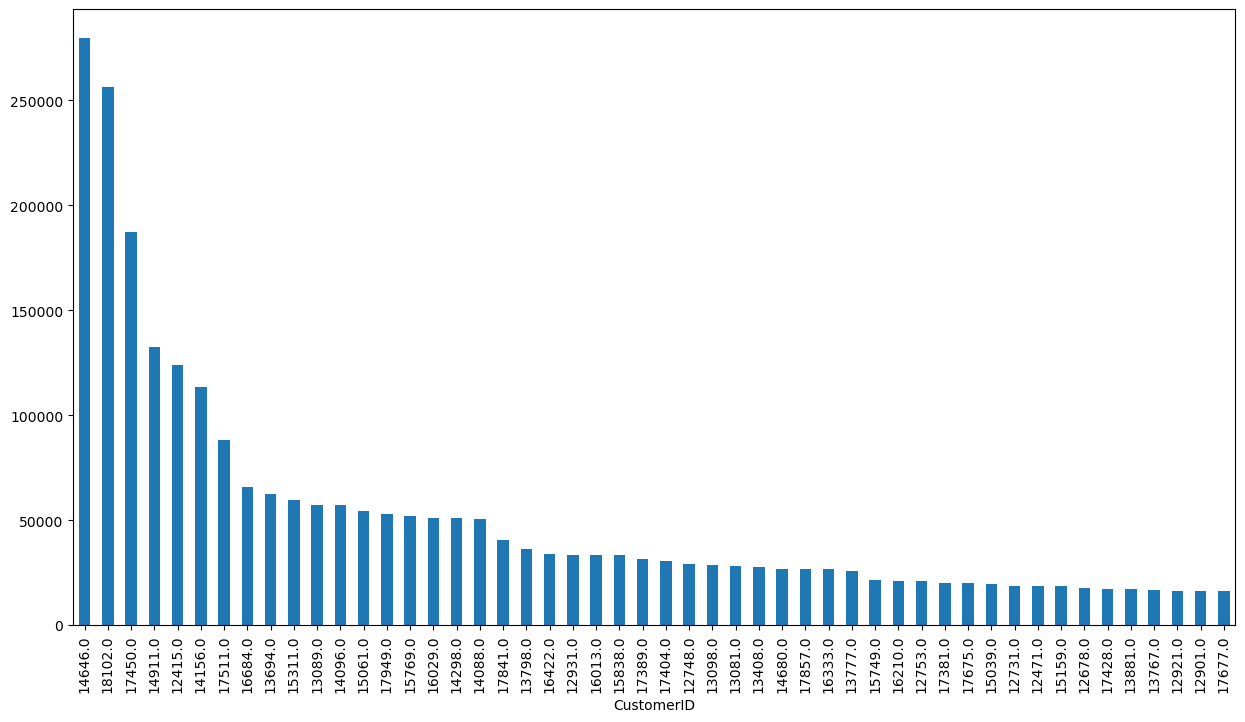

In [47]:
df.groupby('CustomerID')['Amount'].sum().sort_values(ascending=False).head(50).plot.bar(figsize=(15, 8));

**Cumulative sum curve of customers which purchase well**

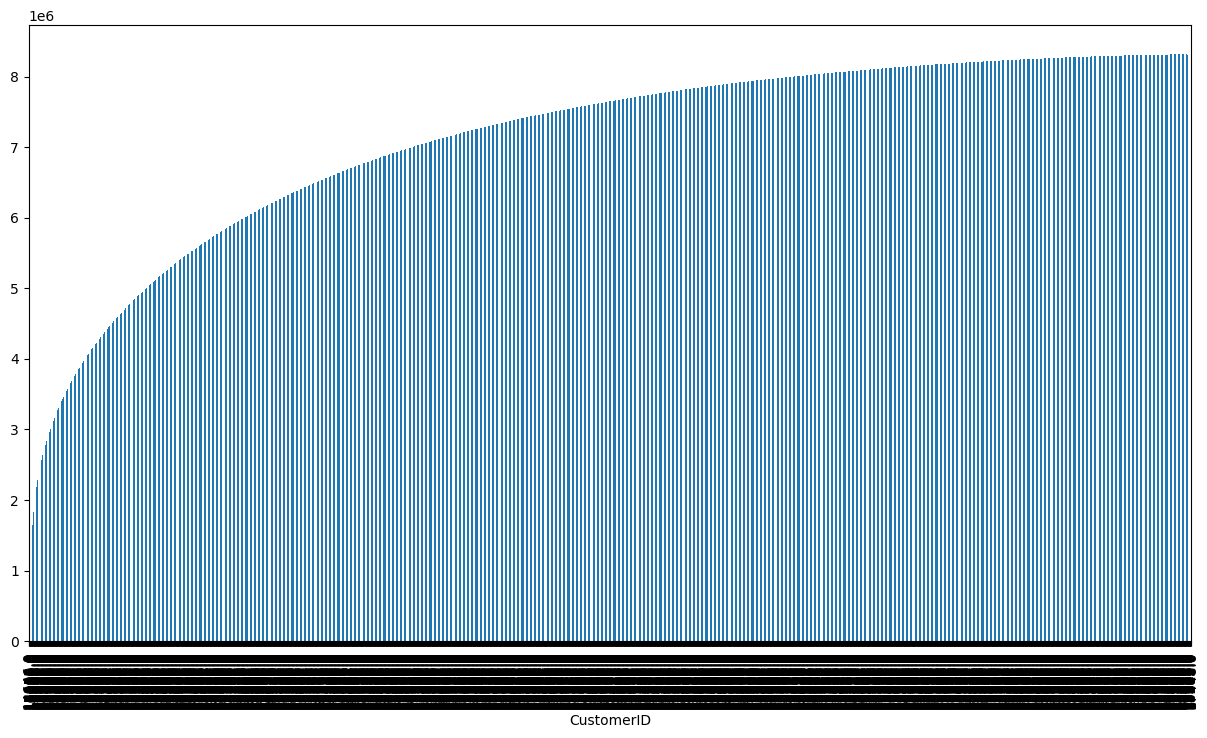

In [48]:
df_cus=pd.DataFrame(df.groupby('CustomerID')['Amount'].sum().sort_values(ascending=False))
df_cus['Amount'].cumsum().plot.bar(figsize=(15, 8));

In [49]:
df_cus['Amount'].head(1200).sum()/df_cus['Amount'].sum()

0.8052123405728937

In [50]:
1200/df_cus.index.nunique()

0.2744739249771272

* **27% of custers occupy more than 80% of revenue.**

**Worst 50 customers which do not purchase well**

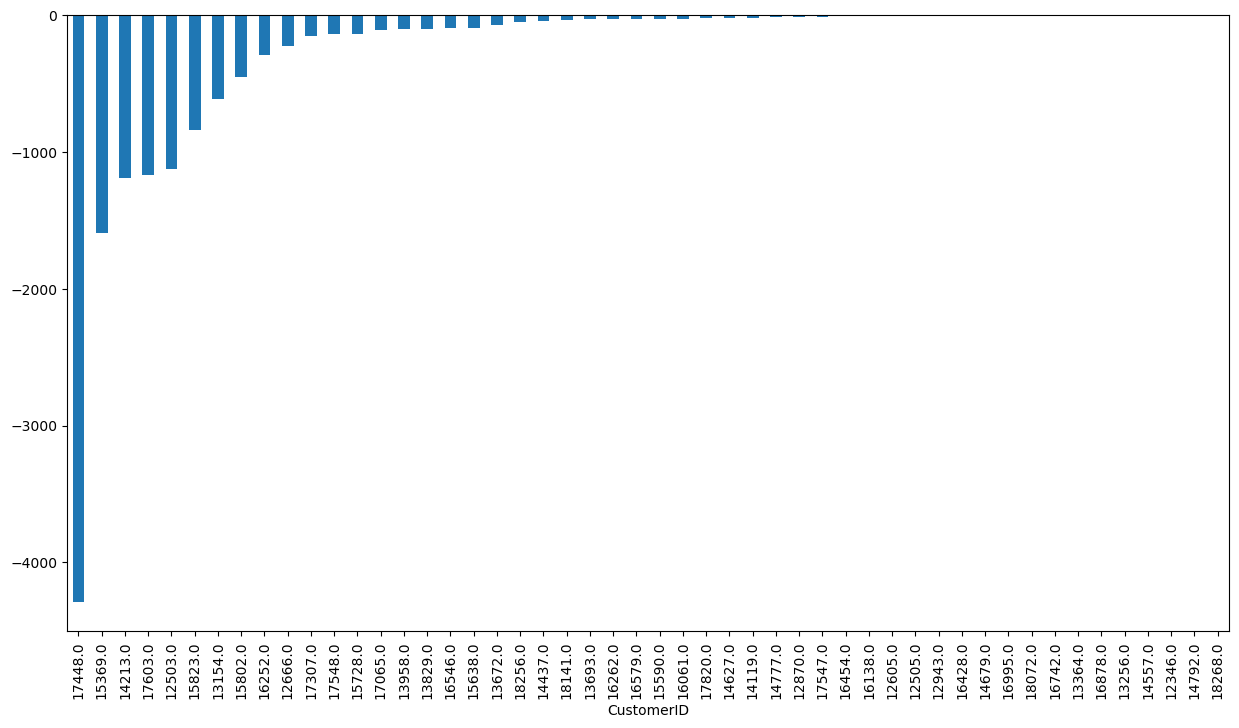

In [51]:
df.groupby('CustomerID')['Amount'].sum().sort_values(ascending=True).head(50).plot.bar(figsize=(15, 8));

**Time Series, Unitprice Boxplot, Unitprice Time Series, Quantity Boxplot, Quantity Time Series of main customers, '14646', '18102' and '17450'**

**1) 14646**

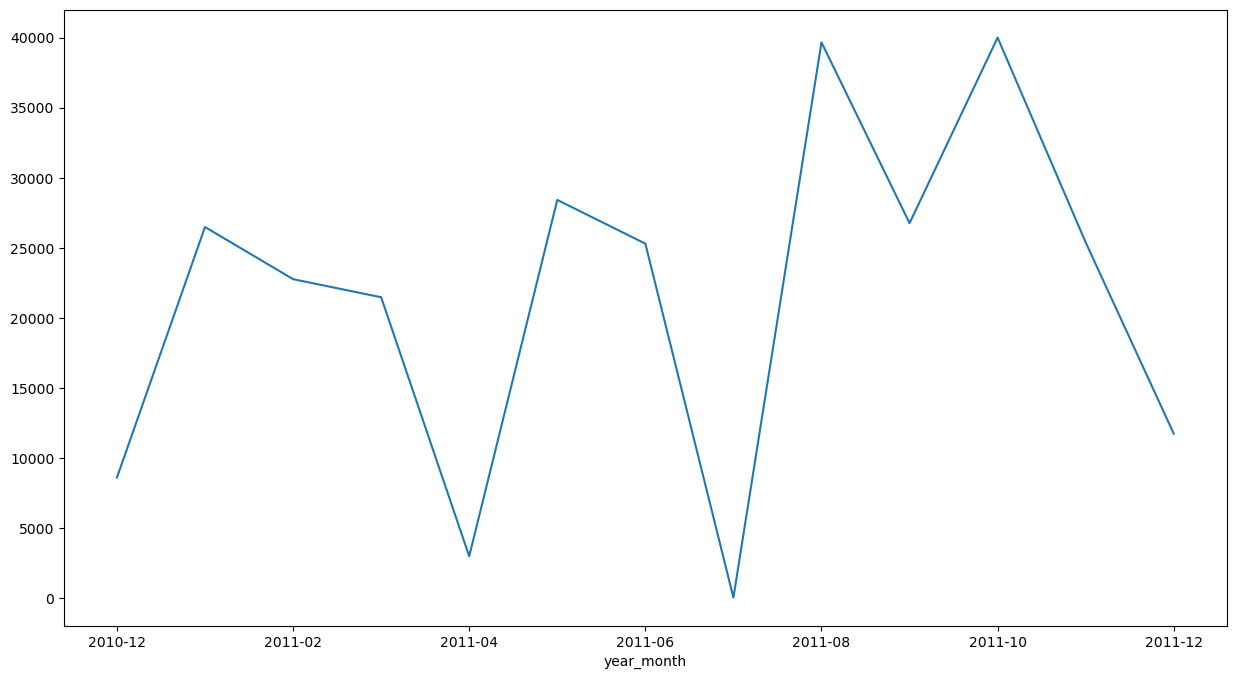

In [52]:
df[df['CustomerID']==14646.0].groupby('year_month')['Amount'].sum().plot(figsize=(15, 8));

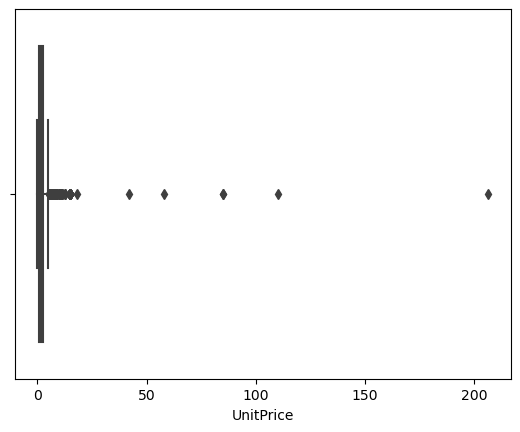

In [53]:
sns.boxplot(data=df[df['CustomerID']==14646.0], x='UnitPrice');

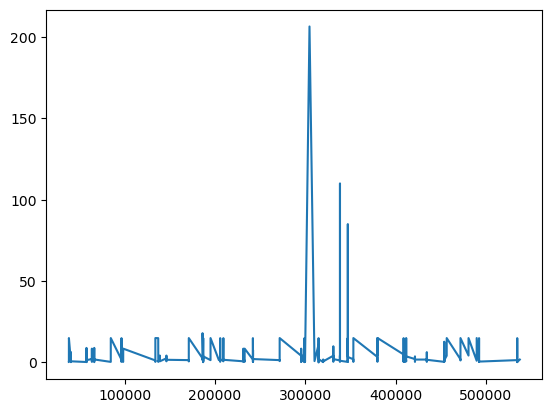

In [54]:
df[df['CustomerID']==14646.0]['UnitPrice'].plot();

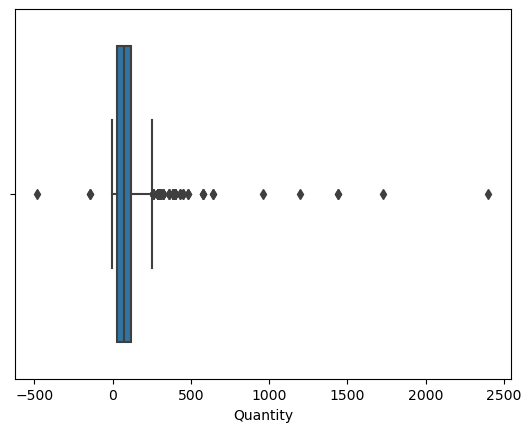

In [55]:
sns.boxplot(data=df[df['CustomerID']==14646.0], x='Quantity');

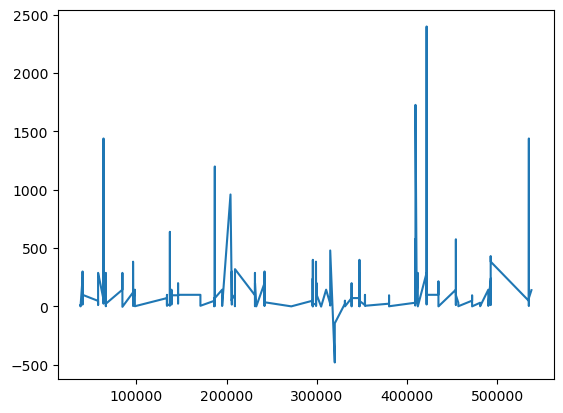

In [56]:
df[df['CustomerID']==14646.0]['Quantity'].plot();

**2) 18102**

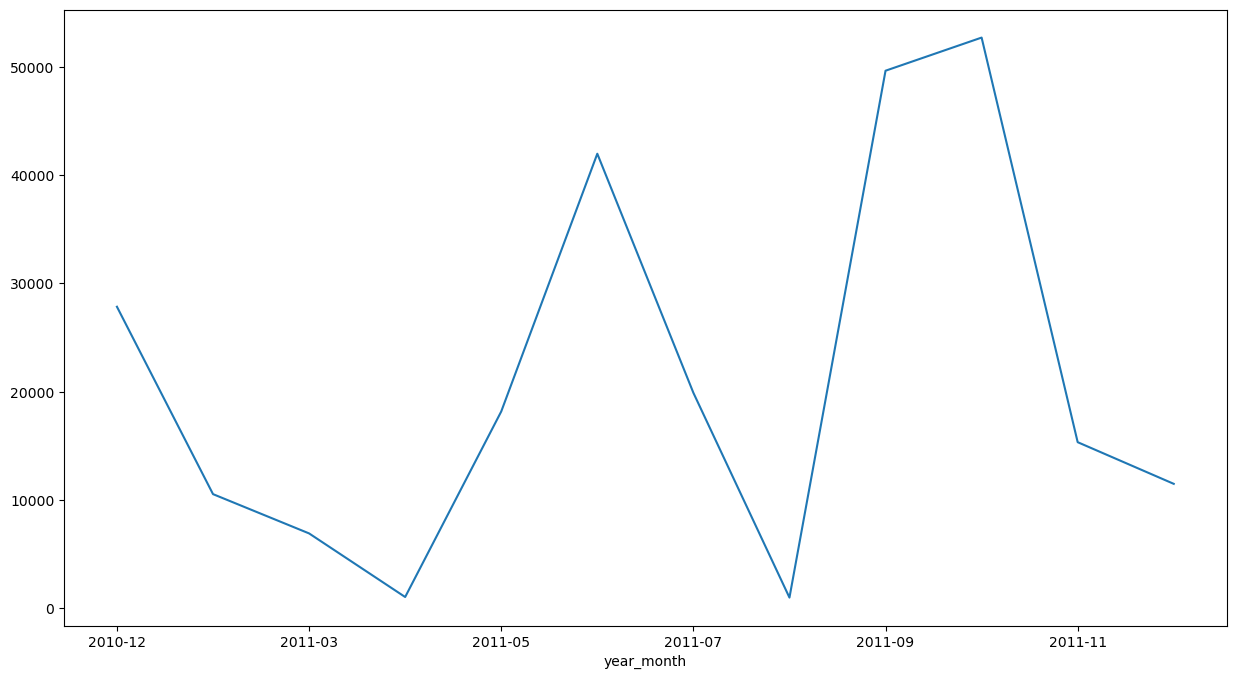

In [57]:
df[df['CustomerID']==18102.0].groupby('year_month')['Amount'].sum().plot(figsize=(15, 8));

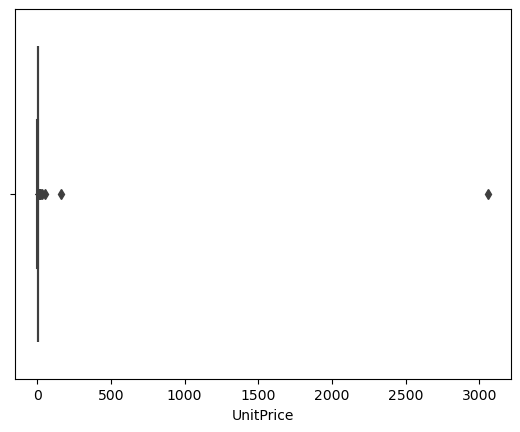

In [58]:
sns.boxplot(data=df[df['CustomerID']==18102.0], x='UnitPrice');

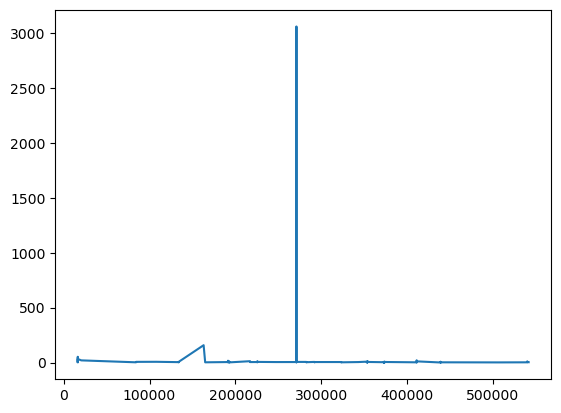

In [59]:
df[df['CustomerID']==18102.0]['UnitPrice'].plot();

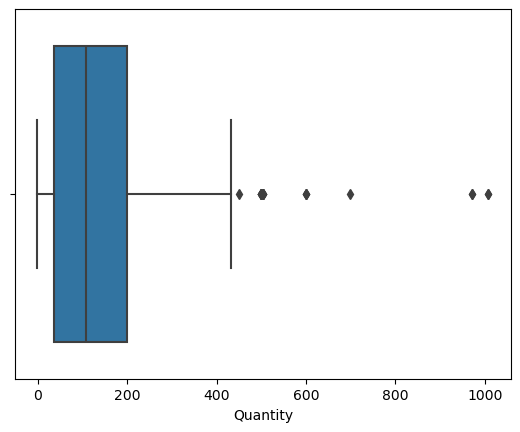

In [60]:
sns.boxplot(data=df[df['CustomerID']==18102.0], x='Quantity');

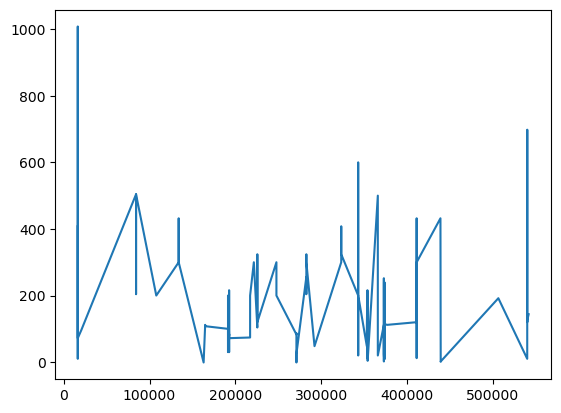

In [61]:
df[df['CustomerID']==18102.0]['Quantity'].plot();

**3) 17450**

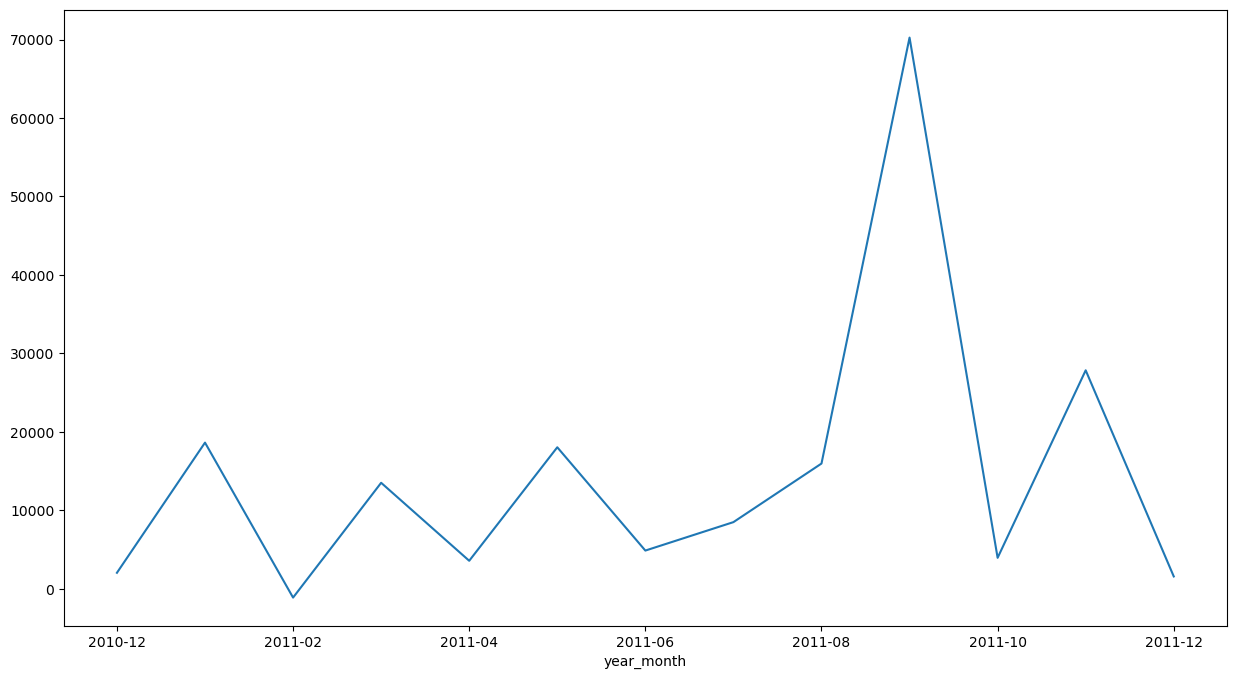

In [62]:
df[df['CustomerID']==17450.0].groupby('year_month')['Amount'].sum().plot(figsize=(15, 8));

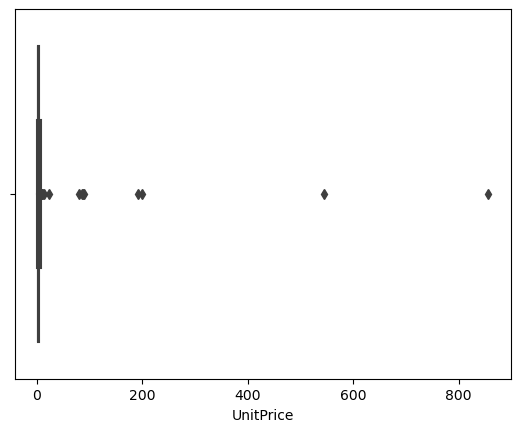

In [63]:
sns.boxplot(data=df[df['CustomerID']==17450.0], x='UnitPrice');

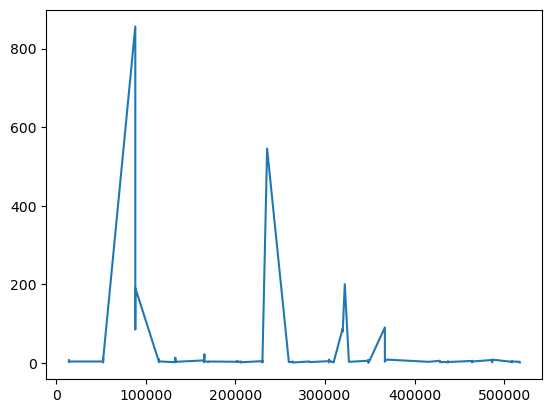

In [64]:
df[df['CustomerID']==17450.0]['UnitPrice'].plot();

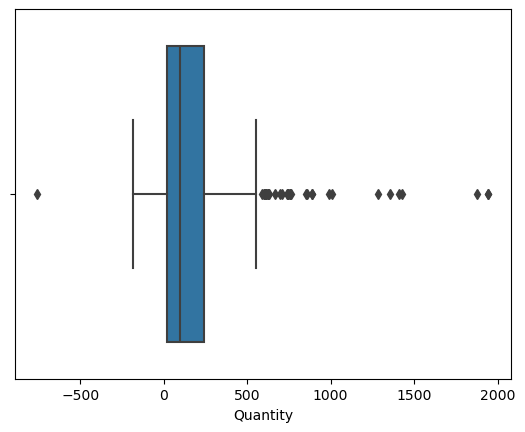

In [65]:
sns.boxplot(data=df[df['CustomerID']==17450.0], x='Quantity');

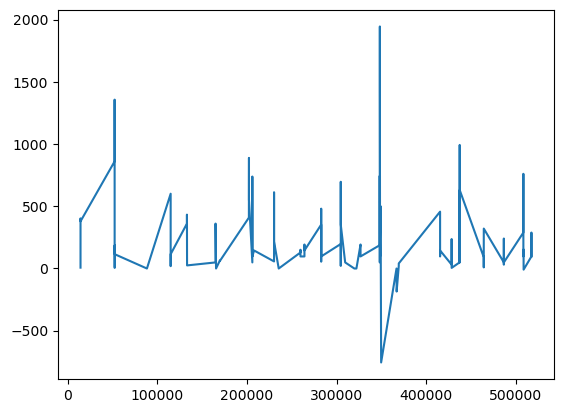

In [66]:
df[df['CustomerID']==17450.0]['Quantity'].plot();

**Apriori Implementation**

 **Data Preparation**

In [67]:
cust_level = df[["CustomerID", "Description"]].sort_values(by = "CustomerID", ascending = False) ## Selecting only required variables for modelling
cust_level['Description'] = cust_level['Description'].str.strip() # Removing white spaces if any
cust_level

,CustomerID,Description
392729,18287.0,GLITTER CHRISTMAS TREE
392732,18287.0,FAWN BLUE HOT WATER BOTTLE
198724,18287.0,PACK OF 6 SWEETIE GIFT BOXES
198725,18287.0,PINK GINGHAM CAT WITH SCARF
198731,18287.0,STRAWBERRY BATH SPONGE
...,...,...
541536,NaN,JUMBO BAG RED RETROSPOT
541537,NaN,JUMBO BAG BAROQUE BLACK WHITE
541538,NaN,LADIES & GENTLEMEN METAL SIGN
541539,NaN,S/4 CACTI CANDLES


 **Create Transaction list**

In [68]:
transactions = [a[1]['Description'].tolist() for a in list(cust_level.groupby(['CustomerID']))] ## Combing all the items in list format for each cutomer

**Train Model**

In [69]:
from apyori import apriori ## Importing apriori package
rules = apriori(transactions = transactions, min_support = 0.002, min_confidence = 0.05, min_lift = 3, min_length = 2, max_length = 2) ## Model Creation

In [70]:
results = list(rules) ## Storing results in list format for better visualisation

In [71]:
results

[RelationRecord(items=frozenset({'10 COLOUR SPACEBOY PEN', '12 COLOURED PARTY BALLOONS'}), support=0.0034309240622140895, ordered_statistics=[OrderedStatistic(items_base=frozenset({'10 COLOUR SPACEBOY PEN'}), items_add=frozenset({'12 COLOURED PARTY BALLOONS'}), confidence=0.08379888268156424, lift=3.489225857940941), OrderedStatistic(items_base=frozenset({'12 COLOURED PARTY BALLOONS'}), items_add=frozenset({'10 COLOUR SPACEBOY PEN'}), confidence=0.14285714285714285, lift=3.4892258579409416)]),
 RelationRecord(items=frozenset({'10 COLOUR SPACEBOY PEN', '12 PENCIL SMALL TUBE WOODLAND'}), support=0.007548032936870997, ordered_statistics=[OrderedStatistic(items_base=frozenset({'10 COLOUR SPACEBOY PEN'}), items_add=frozenset({'12 PENCIL SMALL TUBE WOODLAND'}), confidence=0.18435754189944134, lift=4.197974860335195), OrderedStatistic(items_base=frozenset({'12 PENCIL SMALL TUBE WOODLAND'}), items_add=frozenset({'10 COLOUR SPACEBOY PEN'}), confidence=0.171875, lift=4.197974860335195)]),
 Relat

**Result Customization**

In [72]:
## Creating user-defined function for arranging the results obtained from model into readable format

def inspect(results):
    lhs         = [tuple(result[2][0][0])[0] for result in results]
    rhs         = [tuple(result[2][0][1])[0] for result in results]
    supports    = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts       = [result[2][0][3] for result in results]
    return list(zip(lhs, rhs, supports, confidences, lifts))
resultsinDataFrame = pd.DataFrame(inspect(results), columns = ['Left Hand Side', 'Right Hand Side', 'Support', 'Confidence', 'Lift'])

In [73]:
resultsinDataFrame.nlargest(n=50, columns="Lift") ## Showing best possible scenarios

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
222790,GREEN ENAMEL FLOWER RING,PURPLE ENAMEL FLOWER RING,0.002059,1.000000,397.454545
306177,NUMBER TILE COTTAGE GARDEN 0,NUMBER TILE COTTAGE GARDEN 8,0.002059,0.900000,357.709091
157128,DOLLY GIRL WALL ART,SPACEBOY WALL ART,0.002059,0.900000,327.900000
306175,NUMBER TILE COTTAGE GARDEN 0,NUMBER TILE COTTAGE GARDEN 4,0.002059,0.900000,302.676923
306194,NUMBER TILE COTTAGE GARDEN 3,NUMBER TILE COTTAGE GARDEN 9,0.002059,0.900000,302.676923
306199,NUMBER TILE COTTAGE GARDEN 6,NUMBER TILE COTTAGE GARDEN 9,0.002059,0.900000,302.676923
341238,PURPLE ENAMEL FLOWER RING,RED ENAMEL FLOWER RING,0.002059,0.818182,298.090909
75433,BLUE/YELLOW FLOWER DESIGN BIG MUG,YELLOW/PINK FLOWER DESIGN BIG MUG,0.002516,0.916667,286.261905
306174,NUMBER TILE COTTAGE GARDEN 0,NUMBER TILE COTTAGE GARDEN 2,0.002059,0.900000,281.057143
306176,NUMBER TILE COTTAGE GARDEN 0,NUMBER TILE COTTAGE GARDEN 7,0.002059,0.900000,281.057143
